In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
print("hello")

hello


In [ ]:
a = 10
b = a * 20
print(b)

200


# basic python
## item 
### item2
- data1
  - data2
  

In [ ]:
d = 'hello'
print(d)

hello


In [ ]:
print('test^^^')

test^^^


# 택시비 계산


In [ ]:
# A:  2000원(km),   #5000원 
#2000*x + 5000

x = 10
y = 2000*x + 5000
print(y)

x = [10, 20, 30, 40]

for i in x :
  y = 2000*i + 5000
  print(y)

cost = [2000*i + 5000 for i in x]
print(cost)
y=  x * 3
print(y)

25000
25000
45000
65000
85000
[25000, 45000, 65000, 85000]
[10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40]


tensor([25000, 45000, 65000, 85000])
[25000 45000 65000 85000]


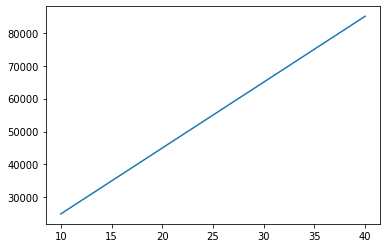

In [ ]:


x = [10,20,30,40]
x = torch.tensor([10,20,30,40])
y = 2000*x + 5000
print(y)
print(y.numpy())

plt.plot(x, y)

# RMSE 계산

In [ ]:
x = torch.tensor([1, 2, 3]).float()
y = torch.tensor([4000, 9000, 15000]).float()


# h =  3000x + 1000
# h =  4000x + 40

#    mean(   (y - h)**2   )

h = 3000*x + 1000
print((y - h)**2)
rmse_1 = torch.sqrt(((y - h)**2).mean())

h2 = 4000*x + 40
rmse_2 = torch.sqrt(((y - h2)**2).mean())

print(rmse_1, rmse_2)

tensor([       0.,  4000000., 25000000.])
tensor(3109.1265) tensor(1796.7378)


# 행렬연산

In [ ]:
a = torch.tensor([ [1,1]
                  ,[2,1]]).float()

inv = torch.inverse(a)

print(inv)

b = inv * a
print(b)

c = torch.matmul(inv, a)
print(c)

y = torch.tensor([[2],
                  [4.4]])
W = torch.matmul(inv, y)
print(W)

#a = torch.tensor([1,2,3,4]).float()
#print(torch.sum(a)   )
#print(a.sum()  )

tensor([[-1.,  1.],
        [ 2., -1.]])
tensor([[-1.,  1.],
        [ 4., -1.]])
tensor([[1., 0.],
        [0., 1.]])
tensor([[ 2.4000],
        [-0.4000]])


# cuda test

In [ ]:
a = torch.tensor([ [1,1] ,[2,1]]).float().cuda()
inv = torch.inverse(a)
i = torch.matmul(inv, a)

In [ ]:
%%time
a = torch.randn(9000,4000)
b = torch.randn(4000,7000)
c = torch.matmul(a, b)

CPU times: user 43.6 ms, sys: 0 ns, total: 43.6 ms
Wall time: 43.2 ms


In [ ]:
%%time
a = torch.randn(9000,4000).cuda()
b = torch.randn(4000,7000).cuda()
c = torch.matmul(a, b)

CPU times: user 16.9 ms, sys: 16.3 ms, total: 33.2 ms
Wall time: 34.5 ms


In [ ]:
dev = torch.device("cpu")  # torch.device("cpu")

a = torch.randn(9000,4000).to(device=dev)
b = torch.randn(4000,7000).to(device=dev)
c = torch.matmul(a, b)

In [ ]:
if torch.cuda.is_available() :
  dev = torch.device("cuda")
else :
  dev = torch.device("cpu")

a = torch.randn(9000,4000).to(device=dev)
b = torch.randn(4000,7000).to(device=dev)
c = torch.matmul(a, b)  

In [ ]:
# 의사역행렬

In [ ]:
a = torch.tensor([ [1,1],
                  [2,1],
                  [3,1]]).float()

y = torch.tensor([[2],
                  [4.4],
                  [6.4]
                  ]).float()

inv = torch.pinverse(a)
print(inv)
print(  torch.matmul(inv, a) )   #  2x3     3x2     = 2x2

W = torch.matmul(inv, y)
print(W)

tensor([[-5.0000e-01,  4.0646e-10,  5.0000e-01],
        [ 1.3333e+00,  3.3333e-01, -6.6667e-01]])
tensor([[ 1.0000e+00,  0.0000e+00],
        [-2.9802e-07,  1.0000e+00]])
tensor([[ 2.2000],
        [-0.1333]])


In [ ]:
W[0], W[1]
W[0].item(), W[1].item()


(2.200000286102295, -0.13333392143249512)

In [ ]:
x = torch.tensor([4,5,6]).float()
h =   W[0]*x + W[1]
print(h)


tensor([ 8.6667, 10.8667, 13.0667])


In [ ]:
x = torch.tensor([ [4, 1],
                  [5,1],
                  [6,1]]).float()
h =   torch.matmul(x, W)
print(h)

tensor([[ 8.6667],
        [10.8667],
        [13.0667]])
